In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection, linear_model, metrics
import seaborn as sns

In [2]:
ds1 = 'dataset/features_list.csv'  # типы данных переменных
ds2 = 'dataset/get_features.csv'   # генеральная совокупность
ds3 = 'dataset/get_status.csv'     # статусы

#### 1) отобрать из генеральной совокупности столбцы, которые представлены в *features_list.csv* с типом данных *numeric*

In [3]:
features, df, status = [pd.read_csv(name, encoding='windows-1251', sep=';', index_col=0) for name in [ds1, ds2, ds3]]
features

,feature_name,field_type
0,age_cred_history,numeric
1,cnt_active_loans,numeric
2,cnt_active_loans_credcard,numeric
3,cnt_active_loans_micr,numeric
4,cnt_active_loans_potr,numeric
...,...,...
138,client_changed_mobile_phone_several_times,logic
139,other_client_cellphone_diff_in_surname,logic
140,other_client_cellphone_diff_in_workphone_children,logic
141,other_client_cellphone_diff_in_surname_homephone,logic


In [4]:
data = df[features.feature_name[features['field_type'] == 'numeric']]
data

,age_cred_history,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_active_loans_potr,cnt_loans,cnt_loans_avto,cnt_loans_credcard,cnt_loans_half_year_credcard,cnt_loans_half_year_micr,...,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_more_than_three_loaners,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,loaner_personal_data_changed_model,loaner_behaviour_model,one_cell_phone_more_than_one_loaner
0,5834,20,3,12,5,65,0,5,1,28,...,0.7604,0.4872,0.0,0.0,3,1,2,0.5580,0.8511,0.0
1,1792,19,1,15,3,78,0,1,0,10,...,0.5093,0.2380,0.0,0.0,1,1,2,0.6003,0.7200,0.0
2,3815,11,1,10,0,61,0,2,0,32,...,0.7097,0.5227,0.0,0.0,4,2,2,0.6532,0.8717,0.0
3,3091,19,1,17,1,133,0,9,0,75,...,0.7962,0.7004,0.0,0.0,5,2,2,0.6039,0.8822,0.0
4,4814,12,1,9,2,37,0,2,0,23,...,0.4574,0.5444,0.0,0.0,1,1,1,0.5784,0.8304,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,4586,20,0,20,0,76,0,3,0,69,...,0.3395,0.5654,0.0,0.0,2,1,1,0.3610,0.8358,0.0
1141,5286,7,4,3,0,46,0,4,0,1,...,0.6900,0.2748,0.0,0.0,3,1,2,0.5792,0.7460,0.0
1142,1155,29,2,21,6,53,0,2,0,42,...,0.2596,0.4878,0.0,0.0,3,1,1,0.5386,0.8511,0.0
1143,771,14,0,13,0,61,0,0,0,22,...,0.8081,0.4251,0.0,0.0,4,1,2,0.5413,0.7534,0.0


#### 2) построить по отобранным столбцам корреляционный анализ со статусом (переменная *status*) из *get_status* 

In [5]:
cor_w = data.corrwith(status.status)
cor_w

age_cred_history                      -0.016501
cnt_active_loans                      -0.109943
cnt_active_loans_credcard             -0.080177
cnt_active_loans_micr                 -0.104246
cnt_active_loans_potr                  0.013395
                                         ...   
unique_cell_phones_last_180_days       0.086777
unique_cell_phones_last_two_years      0.101556
loaner_personal_data_changed_model     0.043227
loaner_behaviour_model                 0.001138
one_cell_phone_more_than_one_loaner    0.062376
Length: 97, dtype: float64

#### 3) отобрать из генерально совокупности переменные, которые имеют корреляцию с переменной *status* $>= 0.05$ (по модулю)

In [6]:
cor_w_features = cor_w.index[abs(cor_w.values) >= 0.05]
data = data[cor_w_features]
data

,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_loans,cnt_loans_credcard,cnt_loans_half_year_micr,cnt_loans_micr,cnt_open_micro_loans_in_the_last_90_days,cnt_request_cred_history_30,cnt_request_micro_loans_in_the_last_30_days,...,score_value,neuro_net_for_mfo,model_2_personal_data_changed,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,one_cell_phone_more_than_one_loaner
0,20,3,12,65,5,28,30,11,25,4,...,694,0.2949,0.5690,0.7604,0.4872,0.0,3,1,2,0.0
1,19,1,15,78,1,10,71,4,11,2,...,628,0.2370,0.5555,0.5093,0.2380,0.0,1,1,2,0.0
2,11,1,10,61,2,32,53,9,9,2,...,763,0.3290,0.7579,0.7097,0.5227,0.0,4,2,2,0.0
3,19,1,17,133,9,75,114,15,29,3,...,742,0.4086,0.6350,0.7962,0.7004,0.0,5,2,2,0.0
4,12,1,9,37,2,23,23,9,24,5,...,691,0.4381,0.4211,0.4574,0.5444,0.0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,20,0,20,76,3,69,69,20,44,5,...,570,0.4970,0.3672,0.3395,0.5654,0.0,2,1,1,0.0
1141,7,4,3,46,4,1,3,1,15,5,...,633,0.4227,0.5238,0.6900,0.2748,0.0,3,1,2,0.0
1142,29,2,21,53,2,42,42,21,18,3,...,683,0.3609,0.4209,0.2596,0.4878,0.0,3,1,1,0.0
1143,14,0,13,61,0,22,60,4,16,3,...,617,0.4377,0.5742,0.8081,0.4251,0.0,4,1,2,0.0


#### 4) среди отобранных переменных провести мультикорреляционный анализ

In [7]:
cor = data.corr()
cor

,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_loans,cnt_loans_credcard,cnt_loans_half_year_micr,cnt_loans_micr,cnt_open_micro_loans_in_the_last_90_days,cnt_request_cred_history_30,cnt_request_micro_loans_in_the_last_30_days,...,score_value,neuro_net_for_mfo,model_2_personal_data_changed,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,one_cell_phone_more_than_one_loaner
cnt_active_loans,1.000000,0.401133,0.929586,0.452929,0.381665,0.547406,0.420634,0.800056,0.163960,0.049331,...,-0.159292,-0.173583,-0.239240,-0.047407,0.111118,-0.054633,0.021621,-0.087498,-0.121639,-0.043315
cnt_active_loans_credcard,0.401133,1.000000,0.122102,0.012703,0.771519,-0.011992,-0.045893,0.124927,0.020411,-0.001122,...,0.031142,-0.091158,-0.085213,0.002012,0.039330,-0.033483,-0.041524,-0.034904,-0.044022,-0.039200
cnt_active_loans_micr,0.929586,0.122102,1.000000,0.497603,0.142283,0.631533,0.492883,0.861310,0.191300,0.062253,...,-0.190006,-0.158442,-0.241754,-0.065738,0.119296,-0.048503,0.046461,-0.090728,-0.114575,-0.037035
cnt_loans,0.452929,0.012703,0.497603,1.000000,0.114030,0.628589,0.993076,0.333424,-0.044414,-0.095121,...,-0.160927,-0.129184,-0.199314,-0.059768,-0.060898,-0.011576,-0.024016,-0.053539,-0.050448,-0.029352
cnt_loans_credcard,0.381665,0.771519,0.142283,0.114030,1.000000,0.028415,0.033922,0.119415,-0.022014,-0.031876,...,0.014587,-0.109633,-0.061840,0.044377,-0.008325,-0.010875,-0.080376,-0.006440,-0.003339,-0.019806
cnt_loans_half_year_micr,0.547406,-0.011992,0.631533,0.628589,0.028415,1.000000,0.637268,0.677085,0.297865,0.089459,...,-0.096108,-0.053747,-0.142152,-0.030002,0.207706,-0.003496,0.120585,-0.036636,-0.073398,-0.005886
cnt_loans_micr,0.420634,-0.045893,0.492883,0.993076,0.033922,0.637268,1.000000,0.331292,-0.037892,-0.095276,...,-0.165929,-0.122244,-0.198059,-0.067608,-0.054812,-0.007652,-0.012154,-0.054291,-0.052952,-0.025335
cnt_open_micro_loans_in_the_last_90_days,0.800056,0.124927,0.861310,0.333424,0.119415,0.677085,0.331292,1.000000,0.393679,0.209513,...,-0.039101,-0.079470,-0.165662,-0.045663,0.251677,-0.058750,0.098431,-0.072095,-0.109358,-0.042760
cnt_request_cred_history_30,0.163960,0.020411,0.191300,-0.044414,-0.022014,0.297865,-0.037892,0.393679,1.000000,0.591796,...,0.167772,0.223094,0.118080,0.194410,0.542963,0.040113,0.186492,0.096410,0.045093,0.062184
cnt_request_micro_loans_in_the_last_30_days,0.049331,-0.001122,0.062253,-0.095121,-0.031876,0.089459,-0.095276,0.209513,0.591796,1.000000,...,0.080668,0.214101,0.045889,0.064718,0.229775,0.043082,0.054540,0.013264,-0.017848,0.035327


#### 5) исключить из генерально совокупности переменную, у которой с другой переменной корреляционная сила $>= 0,5$ и корреляция со статусом ниже

In [8]:
ban_list = set()

for i in cor_w_features:
    for j in cor_w_features:
        if cor[i][j] >= 0.5 and cor[i][j] < 1:
            if abs(cor_w[i]) < abs(cor_w[j]):
                ban_list.add(i)
            else:
                ban_list.add(j)

ban_list

{'cnt_active_loans',
 'cnt_active_loans_credcard',
 'cnt_active_loans_micr',
 'cnt_loans',
 'cnt_loans_credcard',
 'cnt_loans_half_year_micr',
 'cnt_loans_micr',
 'cnt_open_micro_loans_in_the_last_90_days',
 'cnt_request_micro_loans_in_the_last_30_days',
 'delay_30_credcard',
 'delay_30_micr',
 'delay_60_credcard',
 'delay_60_micr',
 'hist_max_active_loans',
 'max_delay_sum_half_year_micr',
 'max_delay_sum_quarter_micr',
 'middle_sum_open_micro_loans_in_the_last_30_days',
 'model_1_personal_data_changed',
 'model_loaner_behaviour',
 'model_one_cell_phone_two_loaners',
 'sum_active_loans',
 'sum_active_loans_credcard',
 'sum_active_loans_micr',
 'sum_closed_micro_loans_in_the_last_90_days',
 'sum_loans_half_year_micr',
 'sum_loans_micr',
 'sum_loans_quarter_micr',
 'sum_loans_year_micr',
 'sum_open_micro_loans_in_the_last_30_days',
 'sum_open_micro_loans_in_the_last_90_days',
 'sum_paid_up_active_loans_micr',
 'unique_cell_phones_last_180_days',
 'unique_cell_phones_last_two_years'}

In [9]:
clean_data = data.drop(ban_list, axis=1)
clean_data

,cnt_request_cred_history_30,delay_5_credcard,delay_5_micr,delay_5_potr,max_delay_days_micr,max_delay_sum_year_micr,middle_sum_closed_micro_loans_in_the_last_30_days,sum_active_loans_not_overdue_micr,sum_active_loans_overdue_micr,sum_loans_credcard,score_value,neuro_net_for_mfo,model_2_personal_data_changed,unique_work_phones_last_365_days,one_cell_phone_more_than_one_loaner
0,25,17,1,44,0,0.00,10863,228528.52,0.00,183000.1,694,0.2949,0.5690,3,0.0
1,11,0,0,0,1002,0.00,7290,21690.00,37350.00,0.0,628,0.2370,0.5555,1,0.0
2,9,0,2,0,0,15000.00,0,202815.60,0.00,20000.0,763,0.3290,0.7579,4,0.0
3,29,1,8,7,0,14900.00,8957,149661.00,0.00,319000.0,742,0.4086,0.6350,5,0.0
4,24,0,1,0,0,2651.80,6166,51372.19,0.00,0.0,691,0.4381,0.4211,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,44,0,3,2,4,22225.00,8246,224878.86,28700.00,364265.0,570,0.4970,0.3672,2,0.0
1141,15,0,0,13,266,8670.74,0,294706.61,205700.12,10000.0,633,0.4227,0.5238,3,0.0
1142,18,0,0,3,0,0.00,10875,243370.55,0.00,15000.0,683,0.3609,0.4209,3,0.0
1143,16,0,10,0,106,14678.00,7400,64133.17,22595.83,0.0,617,0.4377,0.5742,4,0.0


#### 6) по отобранным переменным построить гистограмму распределения значений и вывести названия переменных которые имеют нормальное распределение

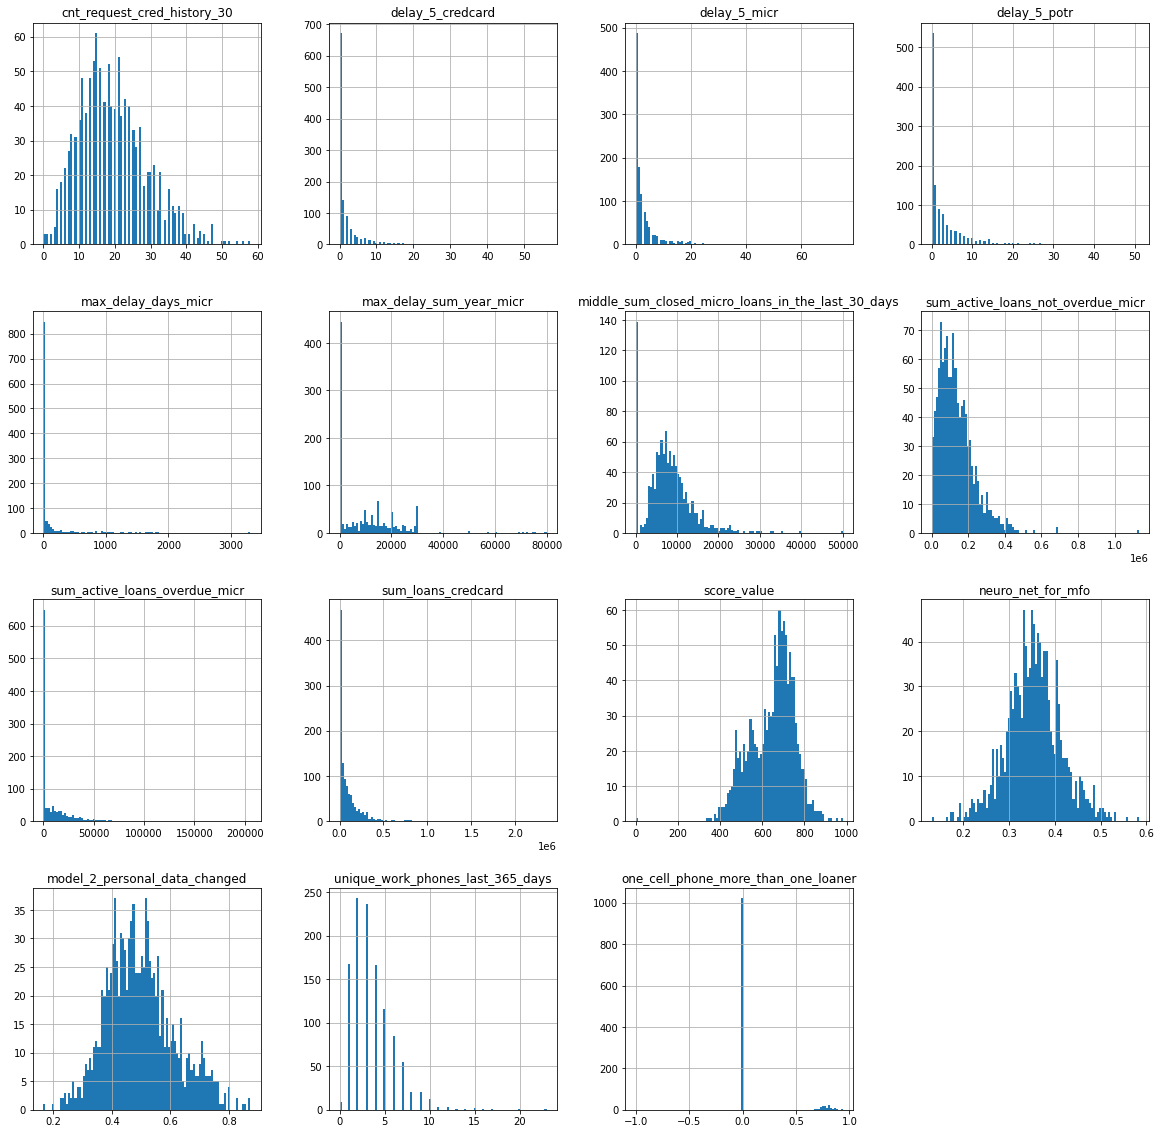

In [10]:
clean_data.hist(figsize = (20, 20), bins = 100)
plt.show()

распределение более менее похоже на нормальное только у параметров *neuro_net_for_mfo* и *model_2_personal_data_changed*

#### 7) разбить выборку на тестовую и обучающую репрезентативно

In [11]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(clean_data, status.status,
                                                                                    test_size=.25, 
                                                                                    random_state=2,
                                                                                    stratify=status.status)

#### 8) построить модель *LogisticRegression* используя библиотеку *scikit learn*

In [12]:
model = linear_model.LogisticRegression(solver='liblinear')
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

#### 9) вывести ключевые метрики точности и отобразить матрицу классификации

In [13]:
report = metrics.classification_report(test_labels, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.18      0.30        87
         1.0       0.73      0.98      0.84       200

    accuracy                           0.74       287
   macro avg       0.77      0.58      0.57       287
weighted avg       0.75      0.74      0.68       287



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

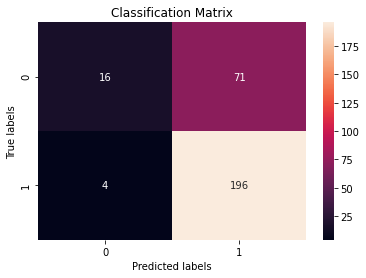

In [14]:
cm = metrics.confusion_matrix(test_labels, predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Classification Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


###### P.S. на выборке столь малого размера предпочтительней использовать кросс-валидацию, потому как метрики могут сильно разниться в зависимости от конкретного разбиения

In [15]:
cross_model = linear_model.LogisticRegression(solver='liblinear')
cross_validaation = model_selection.cross_val_score(cross_model, clean_data, status.status, scoring='accuracy')
cross_validaation.mean()

0.7187772925764191

###### P.P.S. так же стоит обратить внимание что модель заточена на покрытие *status* $= 1$, в то время как ложноположительные прогнозы могут обходиться дороже упущенной выгоды от ложноотрицательных

In [16]:
status.value_counts()

status
1.0       797
0.0       348
dtype: int64